In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "data/MFo1/"
size=224

In [5]:
!ls {PATH}

models	tmp  train  valid


In [6]:
!ls {PATH}valid

female	male  org


In [7]:
#Trainind Set
!find /home/ubuntu/data/MFo1/train/ -type f | wc -l

1116


In [8]:
#Validation Set
!find /home/ubuntu/data/MFo1/valid/ -type f | wc -l

32


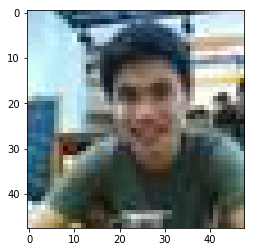

In [10]:
files = !ls {PATH}valid/male | head
img = plt.imread(f'{PATH}valid/male/{files[1]}')
plt.imshow(img);

In [12]:
img.shape

(48, 48, 3)

In [13]:
img[:2,:2]

array([[[168, 204, 230],
        [175, 211, 237]],

       [[169, 205, 231],
        [173, 209, 235]]], dtype=uint8)

In [14]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, size))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

A Jupyter Widget

[ 0.       0.24196  3.77905  0.125  ]                     
[ 1.       0.31008  4.39922  0.0625 ]                     
[ 2.       0.3388   4.35607  0.0625 ]                     



In [16]:
lrf=learn.lr_find()

A Jupyter Widget

[    0.          0.26039  1045.21704     0.09375]         



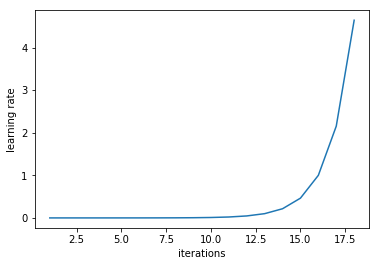

In [17]:
learn.sched.plot_lr()

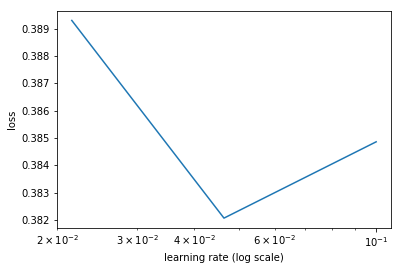

In [18]:
learn.sched.plot()

Logloss is is less at 0.05, so we have to move backward

In [19]:
learn.fit(0.04, 3)

A Jupyter Widget

[ 0.       0.13046  4.48109  0.03125]                     
[ 1.       0.23021  5.31789  0.0625 ]                     
[ 2.       0.27575  6.03702  0.0625 ]                     



Still, it doesn't seem to improve accuracy.

# #Data Augmentation

In [20]:
tfms = tfms_from_model(resnet34, size, aug_tfms=transforms_side_on, max_zoom=1.1)

In [30]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [31]:
ims = np.stack([get_augs() for i in range(6)])

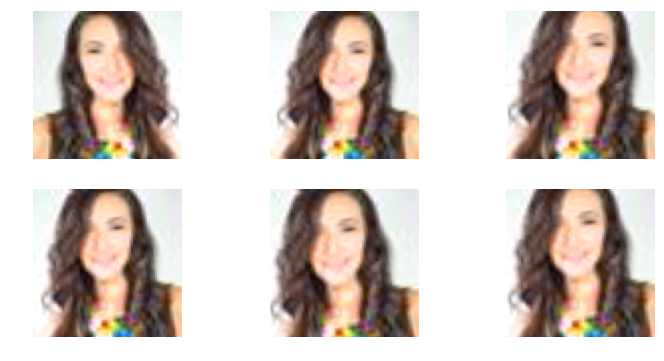

In [32]:
plots(ims, rows=2)

In [33]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [34]:
learn.fit(0.04, 1)

A Jupyter Widget

[ 0.       0.23403  5.16544  0.125  ]                     



In [35]:
learn.precompute=False

In [36]:
learn.fit(0.04, 3, cycle_len=1)

A Jupyter Widget

[ 0.       0.15502  5.29418  0.0625 ]                      
[ 1.       0.24683  5.17223  0.03125]                      
[ 2.       0.2932   4.72028  0.03125]                      



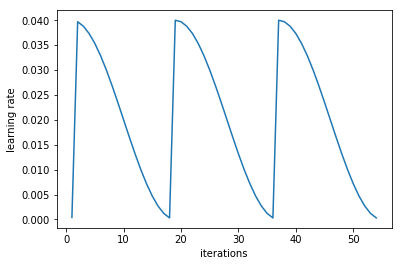

In [37]:
learn.sched.plot_lr()

In [42]:
learn.save('224_lastlayer')

In [43]:
learn.load('224_lastlayer')

# # Fine Tuning

In [44]:
learn.unfreeze()

In [45]:
lr=np.array([1e-4,1e-3,1e-2])

In [46]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.18658  4.5884   0.0625 ]                      
[ 1.       0.27334  5.0092   0.03125]                      
[ 2.       0.31133  4.87581  0.03125]                      
[ 3.       0.3183   4.97825  0.03125]                      
[ 4.       0.31017  5.37589  0.     ]                      
[ 5.       0.29123  5.2955   0.     ]                      
[ 6.       0.27074  5.32477  0.     ]                      



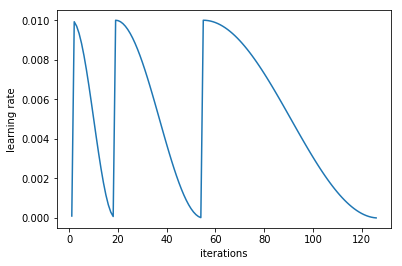

In [47]:
learn.sched.plot_lr()

Note: I just scrapped data from web for male, female and org. 